In [1]:
%matplotlib notebook

# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Import our data into pandas from CSV
country_data = '../output_data/Cleaned_Countries_Data.csv'
data_df = pd.read_csv(country_data, low_memory=False)

data_df.head()

,Unnamed: 0,Country,Waste,Recycled,Lat,Long,GDP (billion USD),Real GDP 2020 (billion USD),Real GDP Per Capita 2020,Wasted Generated Annually (million tons),...,Net Waste,Particulate Matter Emissions (micrograms per m3),C02 Emissions (megatons),Methane Emissions (megatons),Electricity by Unclean Energy (%),Electricity by Clean Energy (%),Urban Population (%),Net Migration,Total Agreement,Development Status
0,0,Algeria,12.38,0.99,28.0,3.00,169.91,468.40,10700.0,12.38,...,11.39,35.17,150.01,49.94,98.9,1.1,74.8,-0.82,-0.82,Developing
1,1,Angola,4.21,0.00,-12.3,18.30,97.26,203.71,6200.0,4.21,...,NaN,27.95,34.69,23.28,28.4,71.6,68.1,-0.19,-0.19,Developing
2,2,Botswana,0.21,0.00,-22.0,24.00,18.34,37.72,16000.0,0.21,...,NaN,21.24,6.34,5.73,99.8,0.2,72.2,2.81,2.81,Developing
3,3,Benin,0.69,0.17,9.3,2.15,10.31,40.29,3300.0,0.69,...,0.52,33.11,6.48,5.80,96.9,3.1,49.5,0.24,0.24,LDC
4,4,Burundi,1.87,0.00,-3.3,30.00,3.03,8.69,700.0,1.87,...,NaN,35.61,0.50,1.42,33.3,66.7,14.4,7.09,7.09,LDC


# Filtering out dummy Recycling Data (Option 1)

In [3]:
# Filter new dataframe by total recycling and recycling % data so it only includes valid outputs
recycling_data_df = pd.DataFrame(data_df.loc[data_df['Wasted Recycled Annually (million tons)']>0,:])
recycling_data_df = pd.DataFrame(data_df.loc[data_df['% of Wasted Recycled Annually']>0,:])
recycling_data_df

,Unnamed: 0,Country,Waste,Recycled,Lat,Long,GDP (billion USD),Real GDP 2020 (billion USD),Real GDP Per Capita 2020,Wasted Generated Annually (million tons),...,Net Waste,Particulate Matter Emissions (micrograms per m3),C02 Emissions (megatons),Methane Emissions (megatons),Electricity by Unclean Energy (%),Electricity by Clean Energy (%),Urban Population (%),Net Migration,Total Agreement,Development Status
0,0,Algeria,12.38,0.99,28.0,3.00,169.91,468.40,10700.0,12.38,...,11.39,35.17,150.01,49.94,98.9,1.1,74.8,-0.82,-0.82,Developing
2,2,Botswana,0.21,0.00,-22.0,24.00,18.34,37.72,16000.0,0.21,...,NaN,21.24,6.34,5.73,99.8,0.2,72.2,2.81,2.81,Developing
3,3,Benin,0.69,0.17,9.3,2.15,10.31,40.29,3300.0,0.69,...,0.52,33.11,6.48,5.80,96.9,3.1,49.5,0.24,0.24,LDC
6,6,Congo (Brazzaville),0.45,0.12,-1.0,15.00,8.72,19.03,3400.0,0.45,...,0.33,38.67,3.28,2.24,70.1,29.9,68.7,0.00,0.00,LDC
7,7,DRC,14.39,0.70,0.0,25.00,47.16,96.03,1100.0,14.39,...,13.69,37.62,2.02,61.24,0.1,99.9,46.8,-0.71,-0.71,LDC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,172,Uruguay,1.26,0.10,-33.0,-56.00,56.11,75.06,21600.0,1.26,...,1.16,8.63,6.77,25.59,2.0,98.0,95.7,-0.88,-0.88,Developing
176,176,Bhutan,0.11,0.00,27.3,90.30,2.40,8.42,10900.0,0.11,...,NaN,35.32,1.26,1.11,0.0,100.0,43.7,0.00,0.00,Developing
177,177,Sri Lanka,2.63,0.34,7.0,81.00,84.02,274.80,12500.0,2.63,...,2.29,15.25,23.36,10.95,64.0,36.0,19.0,-1.22,-1.22,Developing
178,178,India,168.40,8.42,20.0,77.00,2835.93,8443.36,6100.0,168.40,...,159.98,65.20,2407.67,559.11,75.5,24.5,35.9,0.16,0.16,Developing


# Net Waste (Option 2)
(by Development Status)

In [4]:
# OR # Determine Net Waste produced by .loc of recycling data and simple subtraction
dev_waste_data = data_df.loc[data_df["Wasted Recycled Annually (million tons)"] > 0, ["Wasted Generated Annually (million tons)", "Wasted Recycled Annually (million tons)"]]
dev_netwaste = dev_waste_data['Wasted Generated Annually (million tons)'] - dev_waste_data['Wasted Recycled Annually (million tons)']

# Add Net Waste column to dataframe
data_df['Net Waste'] = dev_netwaste

In [5]:
# Groupby main dataframe based upon 'Development Status' and apply agg to Net Waste
dev_netwastegrouped = data_df.groupby('Development Status').agg({'Net Waste': ['sum', 'mean', 'median', 'var', 'std', 'sem']})

# Remove multi-index and flatten headers so data can be referenced in charts
dev_netwastegrouped.columns = dev_netwastegrouped.columns.droplevel(0)
dev_netwastegrouped = dev_netwastegrouped.reset_index()
dev_netwastegrouped

# # OR # Groupby main dataframe based upon 'Development Status'
# dev_c02_sum = data_df.groupby('Development Status')["C02 Emissions (megatons)"].sum()
# dev_c02_mean = data_df.groupby('Development Status')["C02 Emissions (megatons)"].mean()
# dev_c02_median = data_df.groupby('Development Status')["C02 Emissions (megatons)"].median()
# dev_c02_var = data_df.groupby('Development Status')["C02 Emissions (megatons)"].var()
# dev_c02_std = data_df.groupby('Development Status')["C02 Emissions (megatons)"].std()
# dev_c02_sem = data_df.groupby('Development Status')["C02 Emissions (megatons)"].sem()
# print(dev_c02_sum, dev_c02_mean, dev_c02_median, dev_c02_var, dev_c02_std, dev_c02_sem)

,Development Status,sum,mean,median,var,std,sem
0,Developed,356.72,12.300690,3.100,997.790000,31.587814,5.865710
1,Developing,705.13,12.820545,4.310,668.192498,25.849420,3.485535
2,LDC,42.73,3.052143,2.035,12.964095,3.600569,0.962292


# C02 Emissions 
(by Development Status)

In [6]:
# Groupby main dataframe based upon 'Development Status' and apply agg to C02 Emissions
dev_data = data_df.groupby('Development Status').agg({'C02 Emissions (megatons)': ['sum', 'mean', 'median', 'var', 'std', 'sem']})

# Remove multi-index and flatten headers so data can be referenced in charts
dev_data.columns = dev_data.columns.droplevel(0)
dev_data = dev_data.reset_index()
dev_data

,Development Status,sum,mean,median,var,std,sem
0,Developed,10648.55,332.767187,53.66,798620.991150,893.655969,157.977549
1,Developing,21927.20,203.029630,21.73,977197.513404,988.533011,95.121633
2,LDC,205.81,4.900238,2.99,35.586305,5.965426,0.920485


# Pies

<IPython.core.display.Javascript object>


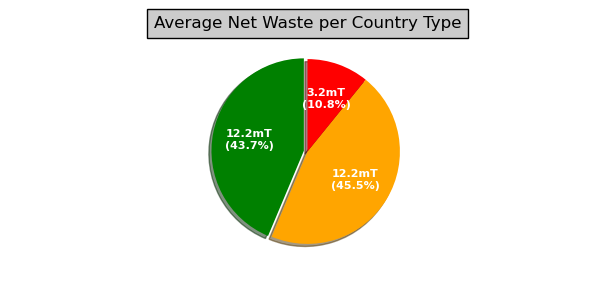

[None, None, None, None, None, None]

In [23]:
fig1, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# Define the data to be shown in chart
data = dev_netwastegrouped['mean']

# Define pieces of the pie
labels = ['Developed', 'Developing', 'LDC']

# The colors of each section of the pie chart
colors = ["green", "orange", "red"]

# Tells matplotlib to separate the Developed section from the others (each number references a pie slab)
explode = (0.04, 0, 0)

# Create pie chart based upon Development Status and C02 Emissions
ax.set_title("Average Net Waste per Country Type", bbox={'facecolor':'0.8', 'pad':5})


def func(allvals, pct):
    absolute = int(np.round(pct/100*np.sum(allvals),2))
    return "{:d}mT\n({:.1f}%)".format(absolute, pct)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(data, pct), textprops=dict(color="w"),
                                 colors=colors, shadow=True, startangle=90, explode=explode)

plt.setp(autotexts, size=8, weight="bold")

<IPython.core.display.Javascript object>


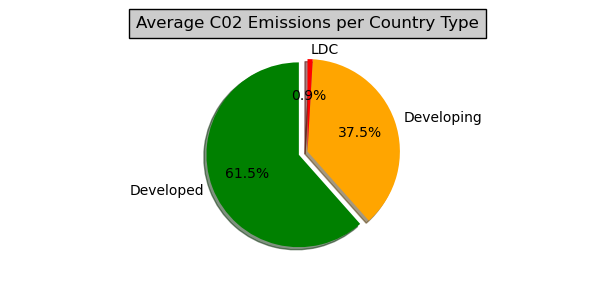

[None, None, None, None, None, None]

In [8]:
fig2, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# Define the data to be shown in chart
data = dev_data['mean']

# Define pieces of the pie
labels = ['Developed', 'Developing', 'LDC']

# The colors of each section of the pie chart
colors = ["green", "orange", "red"]

# Tells matplotlib to separate the Developed section from the others (each number references a pie slab)
explode = (.1, 0, 0)

# Create pie chart based upon Development Status and C02 Emissions
plt.title("Average C02 Emissions per Country Type", bbox={'facecolor':'0.8', 'pad':5})

plt.pie(data, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

plt.setp(autotexts, size=8, weight="bold")